# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\FKBOX\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


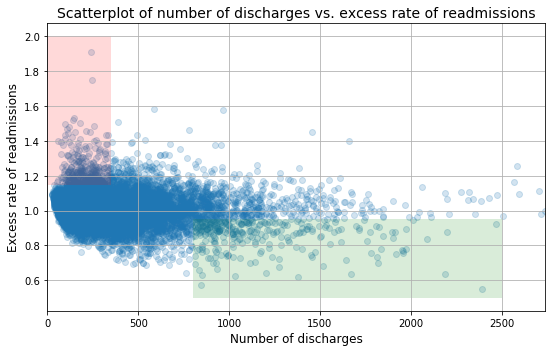

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [18]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [10]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [40]:
# remove the records with no information on discharges
df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
df['Number of Discharges'] = df['Number of Discharges'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 16857
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null float64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 1.1+ MB


C:\Users\FKBOX\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
df_under100 = df[df['Number of Discharges'] < 100]
df_over1000 = df[df['Number of Discharges'] > 1000]


print('Avg Excess Admission Rate < 100:', df_under100['Excess Readmission Ratio'].mean())
print('Percent with Readmission > 1:', sum(df_under100['Excess Readmission Ratio'] > 1)/len(df_under100) * 100)
print('Avg Excess Admission Rate > 1000:', df_over1000['Excess Readmission Ratio'].mean())
print('Percent with Readmission > 1:', sum(df_over1000['Excess Readmission Ratio'] > 1)/len(df_over1000) * 100)

Avg Excess Admission Rate < 100: 1.0226183501683486
Percent with Readmission > 1: 59.18045705279747
Avg Excess Admission Rate > 1000: 0.9783354211663071
Percent with Readmission > 1: 44.49244060475162


I do not agree with the above analysis and recommendations, since it is drawing a lot of conclusions only from a simple plot of two metrics. Their statistical summary is more or less true, but there is no reason to say with full confidence that there is always excess readmissions for lower discharge rate and vice versa, since one might even consider some of those data points to be outliers. The plot shows us that the bulk of the data live together in the low discharge area, with a range of readmissions from 0.8 to above the excess amount. There does seem to be an overall negative relationship. We will have to see whether these two means are significantly different or not.

### Hypothesis Testing

$N_0$ = Discharges and Readmissions have no correlation

$N_A$ = Discharges and Readmissions have at least some correlation.

C:\Users\FKBOX\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\FKBOX\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


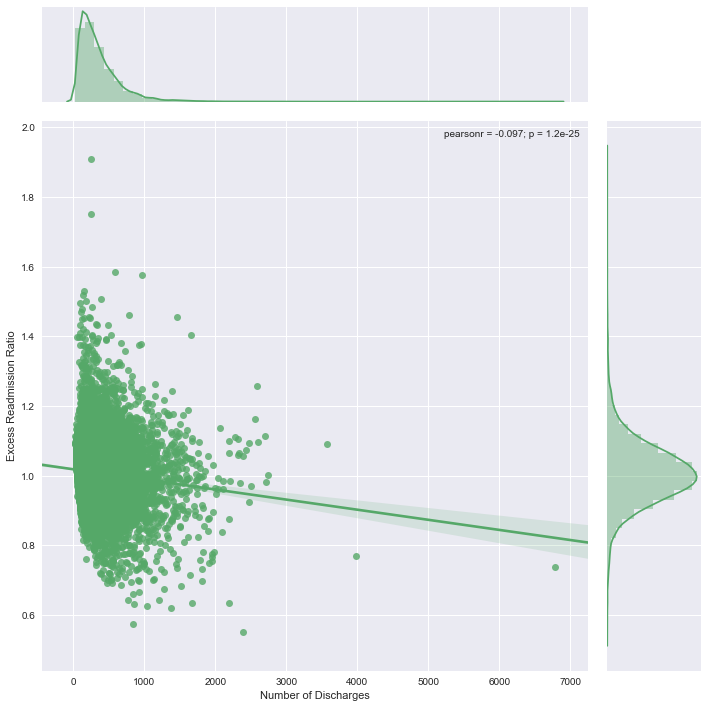

In [44]:
import seaborn as sns

sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df, kind='reg', color='g', size=10)
plt.show()

From this joint plot, we can see that we do not have a very strong correlation. Our p-value certainly is below a 0.01 significance level (which means we reject our null hypothesis), however the pearsonr coefficient shows us that the correlation is rather weak. This does not suggest to me that we should take very drastic action such as changing many regulations for smaller hospitals - at least not without further research into what may be the root cause.

This method does show us that there is a small statistical significance in the data, however there is not enough evidence to imply practical signifance, since the relationship is so weak. The suggested actions above are not practical since they are very drastic changes but we would not be sure if they are truly addressing the reason why the data behaves in this way.

A benefit to using 2nd scatterplot here as opposed to the 1st one provided is the fact that we can see the distribution of either variable and it calculates the pearsonr and p-value for us. This provides us with more information than just the highlighted rectangular areas of the first plot.